<a href="https://colab.research.google.com/github/kartik10sharma/cv_prj/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

smile data for p1 is used


In [2]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
import glob

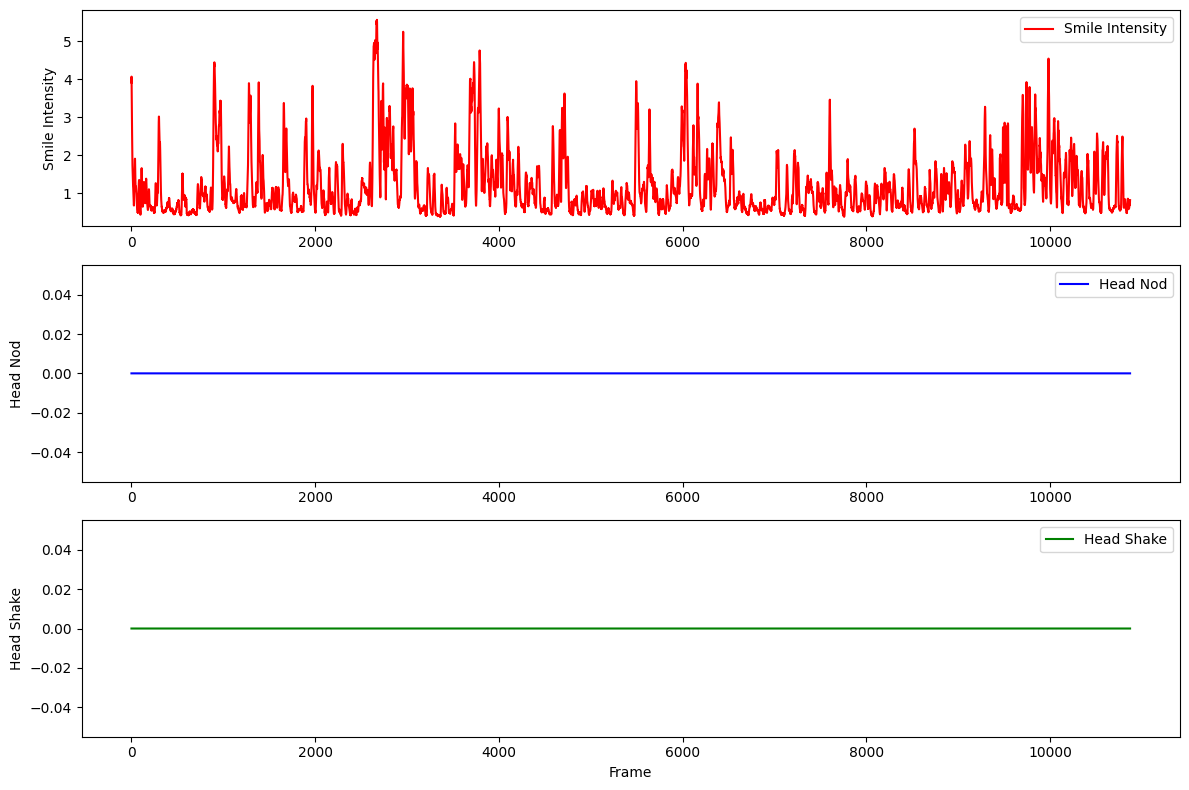

Detected 161 smile events above threshold.
Statistics saved to smile_stats.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data (change file path and separator as needed)
file_path = '/content/sample_data/input_data/Smoothed-features-P86.txt'  # Use your actual filename
# Assuming the values are separated by spaces within each row of the first column
df = pd.read_csv(file_path, sep='\t', header=None)

# 2. Extract and process the smile intensity column
# Split the string in the first column by spaces and convert to numeric
all_features = df.iloc[:, 0].str.split(expand=True).astype(float)
smile_intensity = all_features.iloc[:, 1] # Assuming smile intensity is in the 13th column (index 12)


# 3. Extract head nod and head shake data (assuming they are in specific columns)

head_nod = all_features.iloc[:, 3]
head_shake = all_features.iloc[:, 4]


# 4. Plot smile intensity, head nod, and head shake
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(smile_intensity, color='red', label='Smile Intensity')
plt.ylabel('Smile Intensity')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(head_nod, color='blue', label='Head Nod')
plt.ylabel('Head Nod')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(head_shake, color='green', label='Head Shake')
plt.xlabel('Frame')
plt.ylabel('Head Shake')
plt.legend()

plt.tight_layout()
plt.show()

# 5. (Optional) Detect smile events above a threshold
def detect_smile_events(smile_data, threshold=1.0, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

events = detect_smile_events(smile_intensity)
print(f"Detected {len(events)} smile events above threshold.")

# 6. (Optional) Save statistics to CSV
stats = {
    'mean': [smile_intensity.mean()],
    'std': [smile_intensity.std()],
    'max': [smile_intensity.max()],
    'min': [smile_intensity.min()],
    'num_events': [len(events)]
}
stats_df = pd.DataFrame(stats)
stats_df.to_csv('smile_stats.csv', index=False)
print("Statistics saved to smile_stats.csv")

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_folder = '/content/sample_data/input_data'
output_folder = '/content/sample_data/output_data'
os.makedirs(output_folder, exist_ok=True)

def detect_smile_events(smile_data, threshold=1.0, min_duration=2):
    events = []
    in_smile = False
    start = 0
    for i, val in enumerate(smile_data):
        if not in_smile and val > threshold:
            in_smile = True
            start = i
        elif in_smile and val <= threshold:
            in_smile = False
            if i - start >= min_duration:
                events.append((start, i-1))
    return events

summary_stats = []

for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_folder, filename)
        print(f"Processing {filename}...")

        try:
            # 1. Load the data
            df = pd.read_csv(file_path, sep='\t', header=None)

            # 2. Extract and process the smile intensity column
            all_features = df.iloc[:, 0].str.split(expand=True).astype(float)
            smile_intensity = all_features.iloc[:, 1]  # adjust index if needed

            # 3. Extract head nod and shake (adjust columns as needed)
            head_nod = all_features.iloc[:, 3]
            head_shake = all_features.iloc[:, 4]

            # 4. Plot smile intensity, head nod, and shake
            plt.figure(figsize=(12, 8))

            plt.subplot(3, 1, 1)
            plt.plot(smile_intensity, color='red', label='Smile Intensity')
            plt.ylabel('Smile Intensity')
            plt.legend()

            plt.subplot(3, 1, 2)
            plt.plot(head_nod, color='blue', label='Head Nod')
            plt.ylabel('Head Nod')
            plt.legend()

            plt.subplot(3, 1, 3)
            plt.plot(head_shake, color='green', label='Head Shake')
            plt.xlabel('Frame')
            plt.ylabel('Head Shake')
            plt.legend()

            plt.tight_layout()
            plot_path = os.path.join(output_folder, f"{filename}_plot.png")
            plt.savefig(plot_path)
            plt.close()

            # 5. Detect smile events
            events = detect_smile_events(smile_intensity)
            print(f"Detected {len(events)} smile events in {filename}.")

            # 6. Save statistics
            stats = {
                'filename': filename,
                'mean': smile_intensity.mean(),
                'std': smile_intensity.std(),
                'max': smile_intensity.max(),
                'min': smile_intensity.min(),
                'num_events': len(events)
            }
            summary_stats.append(stats)

            stats_df = pd.DataFrame([stats])
            stats_csv_path = os.path.join(output_folder, f"{filename}_stats.csv")
            stats_df.to_csv(stats_csv_path, index=False)

        except Exception as e:
            print(f"❌ Failed to process {filename}: {e}")

# Save all file stats in a master CSV
summary_path = os.path.join(output_folder, "smile_summary_all.csv")
pd.DataFrame(summary_stats).to_csv(summary_path, index=False)
print(f"\n✅ All stats saved to {summary_path}")





Processing Smoothed-features-P86.txt...
Detected 161 smile events in Smoothed-features-P86.txt.
Processing Smoothed-features-P71.txt...
Detected 54 smile events in Smoothed-features-P71.txt.
Processing Smoothed-features-P14.txt...
Detected 68 smile events in Smoothed-features-P14.txt.
Processing Smoothed-features-P61.txt...
Detected 12 smile events in Smoothed-features-P61.txt.
Processing Smoothed-features-P50.txt...
Detected 8 smile events in Smoothed-features-P50.txt.
Processing Smoothed-features-P34.txt...
Detected 153 smile events in Smoothed-features-P34.txt.
Processing Smoothed-features-P31.txt...
Detected 93 smile events in Smoothed-features-P31.txt.
Processing Smoothed-features-P77.txt...
Detected 64 smile events in Smoothed-features-P77.txt.
Processing Smoothed-features-P44.txt...
Detected 167 smile events in Smoothed-features-P44.txt.
Processing Smoothed-features-P69.txt...
Detected 107 smile events in Smoothed-features-P69.txt.
Processing Smoothed-features-P84.txt...
Detecte